<a href="https://colab.research.google.com/github/agustinsantos/CorrelatedQPQ/blob/main/Testing_QPQ_Copulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# set theme
plt.style.use('bmh')
sns.set_style('darkgrid')

# Introduction

The objective of this notebook is to carry out proofs of concept on the use of Copulas as a tool for the development of QPQ with correlated players. The intention is to make mathematical analyzes and simulations of various copulas and study their behavior in the development of QPQ algorithms. For this, copulas with simple mathematical definitions that can be treated analytically and later verified by simulation will be used.

Code and examples from:
* https://medium.com/@financialnoob/introduction-to-copulas-part-1-2ccbc5373d2e
    * https://github.com/financialnoob/misc/blob/9e811aa1192d1384485e07f88d8240154eb46c03/4.introduction_to_copulas_1.ipynb
* https://medium.com/@financialnoob/introduction-to-copulas-part-2-9de74010ed87
    * https://github.com/financialnoob/misc/blob/d9151d1128d84d8f3585b00ba41b73f5303499b7/5.introduction_to_copulas_2.ipynb
    
Material about Copula
* http://archiv.stochastik.uni-freiburg.de/homepages/schmidt/publications/TSchmidt_eqf_Copulas.pdf
* http://www.columbia.edu/~mh2078/QRM/Copulas.pdf
* https://www.uni-ulm.de/fileadmin/website_uni_ulm/mawi.inst.110/Seminar__Copulas_and_Applications_WS2021/David_Ziener_-_Notes__Archimedean_Copulas.pdf
* https://www.math.tugraz.at/~cela/Vorlesungen/RiskEnglisch/19_20/Lecture9_5_11_2019.pdf


# Concept of copulas
Copulas are a tool for modeling and capturing the dependence of two or more random variables. The main purpose of a copula is to disentangle the dependence structure of a random vector from its marginals. A d-dimensional copula is defined as a function $ C : [0, 1]^{d}  \rightarrow [0, 1] $ which is a cumulative distribution function (cdf) with uniform marginals.

Copula is just a joint CDF of multiple random variables with marginal distributions Uniform(0,1). Copula allows us to separate modeling of dependence structure from modeling marginal distributions (because we can use probability integral transform to transfrom uniform distribution to any distribution of our choice).

The copula of $(X_{1},X_{2},\dots ,X_{d})$ is defined as the joint cumulative distribution function of $(U_{1},U_{2},\dots ,U_{d})$:

$$ C(u_{1},u_{2},\dots ,u_{d})=\Pr[U_{1}\leq u_{1},U_{2}\leq u_{2},\dots ,U_{d}\leq u_{d}] $$,

where $U_i = F_i(X_i)$ is the marginal CDFs of $X_i$.
## Sklar's Theorem
Let $H$ be a $d$-dimensional distribution function with marginal distribution functions $U_1, \dots, U_d$. Then there exists a copula $C$ such that

$$H(u_1,\cdots, u_d)=C(U_1(u_1),\cdots,u_d(u_d)).$$
Conversely, for any univariate distribution functions $U_1, \dots, U_d$ and any copula $C$, the function H is a $d$-dimensional distribution function with marginals $U_1, \dots, U_d$. Furthermore, if $U_1, \dots, U_d$ are continuous, then $C$ is unique.


## Important Copulas
### Independence copula
First of all, the independence copula is given by:
$$\prod(\textbf{u}) = \prod_{i=1}^{d}u_i$$

### Archimedean family
Archimedean family is probably the most famous class of copulas. Archimedean copulas are an associative class of copulas. Most common Archimedean copulas admit an explicit formula, something not possible for instance for the Gaussian copula. In practice, Archimedean copulas are popular because they allow modeling dependence in arbitrarily high dimensions with only one parameter, governing the strength of dependence.

A copula C is called Archimedean if it admits the representation:
$${\displaystyle C(u_{1},\dots ,u_{d};\theta )=\psi ^{[-1]}\left(\psi (u_{1};\theta )+\cdots +\psi (u_{d};\theta );\theta \right)}$$

where $\psi \!:[0,1]\times \Theta \rightarrow [0,\infty )$ is a continuous, strictly decreasing and convex function such that $\psi (1;\theta )=0$,
 $\theta$ is a parameter within some parameter space $\Theta$, and $\psi$ is the so-called generator function and $\psi ^{[-1]}$ is its pseudo-inverse defined by

$${\displaystyle \psi ^{[-1]}(t;\theta )=\left\{{\begin{array}{ll}\psi ^{-1}(t;\theta )&{\mbox{if }}0\leq t\leq \psi (0;\theta )\\0&{\mbox{if }}\psi (0;\theta )\leq t\leq \infty .\end{array}}\right.}$$.


### Comonotononicity copula
The comonotononicity copula or the Fréchet-Hoeffding upper bound is given by
$$\min \bigl\{u_1,\dots, u_d\bigl\}$$.

# Previous concepts

## Probability Integral Transform
(from Wikipedia) In probability theory, the probability integral transform (also known as universality of the uniform) relates to the result that data values that are modeled as being random variables from any given continuous distribution can be converted to random variables having a standard uniform distribution.

Suppose that a random variable $X$ has a continuous distribution for which the cumulative distribution function (CDF) is $F_{X}$. Then the random variable $Y$ defined as $ Y:=F_{X}(X)$, has a standard uniform distribution

$$ \begin{align}
F_Y (y) & = \operatorname{P}(Y\leq y) \\
        & = \operatorname{P}(F_X (X)\leq y) \\
        & = \operatorname{P}(X\leq F^{-1}_X (y)) \\
        & = F_X (F^{-1}_X (y)) \\
        & = y
\end{align} $$

In [ ]:
X = stats.norm.rvs(size=10000)
X_transformed = stats.norm.cdf(X)

Text(0.5, 1.0, 'Histogram of transformed X')

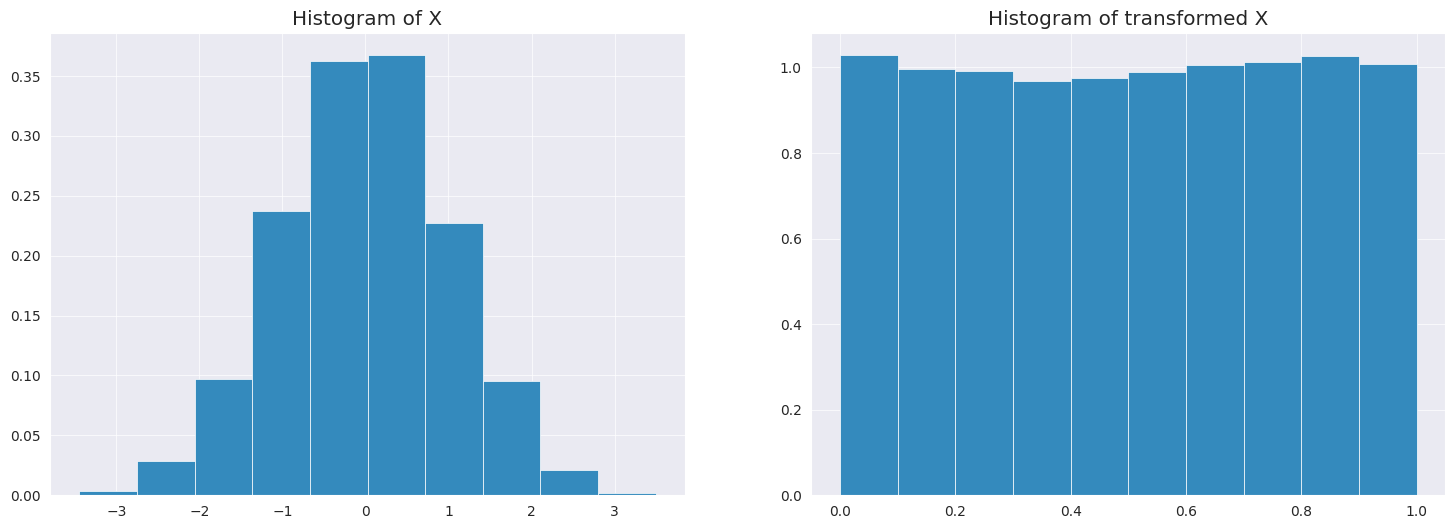

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(X, density=True, bins=10)
plt.title('Histogram of X')
plt.subplot(122)
plt.hist(X_transformed, density=True, bins=10)
plt.title('Histogram of transformed X')

In [ ]:
X = stats.uniform.rvs(size=10000)
X_transformed = stats.norm.ppf(X)

Text(0.5, 1.0, 'Histogram of transformed X')

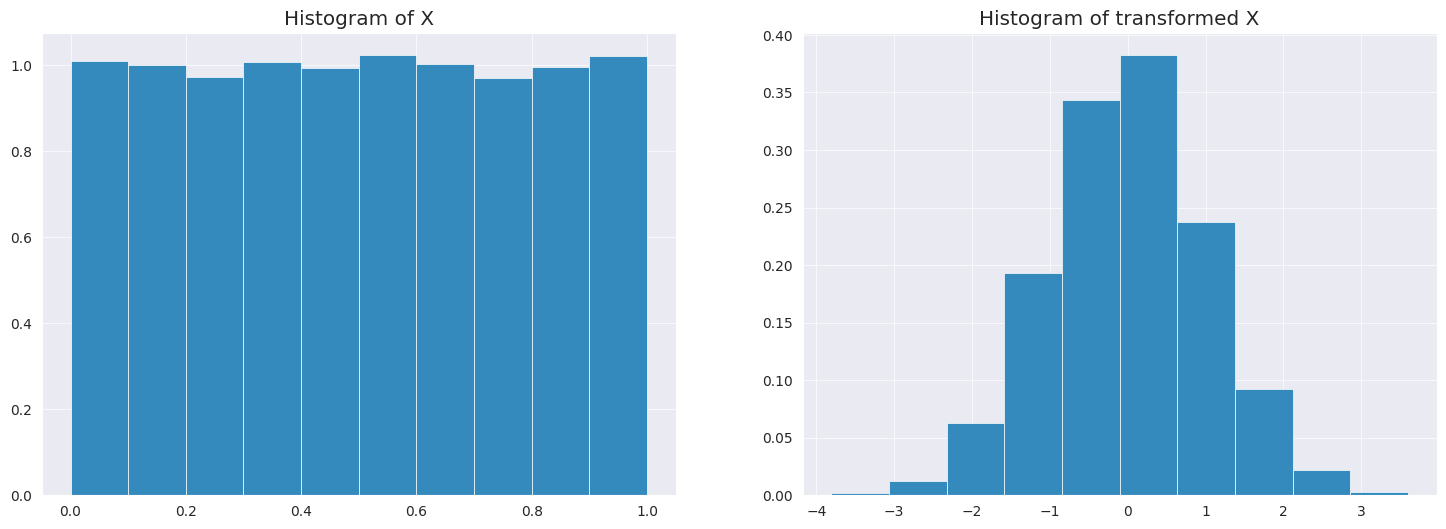

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(X, density=True, bins=10)
plt.title('Histogram of X')
plt.subplot(122)
plt.hist(X_transformed, density=True, bins=10)
plt.title('Histogram of transformed X')

## Beta distribution
The probability density function (PDF) of the beta distribution, for $0 \leq x \leq 1$, and shape parameters $\alpha, \beta > 0$, is a power function of the variable $x$ and of its reflection $(1 − x)$ as follow:

$$f(x;\alpha ,\beta ) = \frac{x^{\alpha-1}(1-x)^{\beta-1}} {B(\alpha,\beta)}$$

#### Analysis using SymPy

In [ ]:
from sympy.stats import Beta, density, E, variance
from sympy import Symbol, simplify, pprint, factor, lambdify

alpha = Symbol("alpha", positive = True)
beta = Symbol("beta", positive = True)
x = Symbol("x")

# Using sympy.stats.Beta() method
X = Beta("x", alpha, beta)
gfg = density(X)(x)
gfg

x**(alpha - 1)*(1 - x)**(beta - 1)/beta(alpha, beta)

$X_1,X_2,\dots,X_d$ are $d$ i.i.d. uniform random variables. Let $Y=\min(X_1,X_2,\dots,X_d)$.
By definition, $F(y)=P(Y\leq y)=1−P(Y>y)=1−P(\min(X_1,X_2,\dots,X_d)>y)$. Of course, $\min(X_1,X_2,\dots,X_d)>y$ exactly when $X_i>y$ for all $i$. Since these variables are i.i.d., we have $F(y)=1−P(X_1>y)P(X_2>y)\dots P(X_d>y)=1−P(X_1>y)^d$.

Assuming the $X_i$ are uniformly distributed on $(a,b)$, this yields
$$F(y) = \left\{
     \begin{array}{ll}
       1 - \left(\frac{b-y}{b-a}\right)^d & : y \in (a, b)\\
       0 & : y < a\\
       1 & : y > b
     \end{array}
\right.$$

We take the derivative to get the density function.
$$f(y) = \left\{
     \begin{array}{ll}
       \frac{d}{b-a} \left(\frac{b-y}{b-a}\right)^{d-1} & : y \in (a, b)\\
       0 & : \text{otherwise}
     \end{array}
\right.$$

if $a=0$, $b=1$ then:
$$f(y) = \left\{
     \begin{array}{ll}
       d \left(1-y\right)^{d-1} & : y \in (0, 1)\\
       0 & : \text{otherwise}
     \end{array}
\right.$$

In the case of QPQ , we are interested in the probability that the aggregated player reports the value $y$ as the minimum value of all the players in the cluster. This corresponds to the probability that all the others players (in the cluster) have values greater than "y". In the case of two independent players and following uniforms, the probability is:

$$ Prb(y=\min(u_2, \dots, u_d)) = \int_y^1\dots \int_y^1 f_{\neq u1}(u_2, \dots, u_d) \,du_2, \dots, \,du_d = (d-1)(1-y)^{(d-2)}$$

This can also be calculated directly without using the density functions, just using the CDFs.
$$F_{\neq u1}(y) = (d-1)P(X_i > y)^{(d-2)} = (d-1)\left(1−P(X_i \leq y)\right)^{(d-2)} = (d-1)(1-y)^{(d-2)}$$


NOTE that this probability corresponds to the PDF of the Beta distribution when $alpha = 1$ and $beta = (d-1)$

At some point we will be interested in knowing the probability mass that exists in a given region. This can also be calculated with CDFs. For example:

$$ Prb(y=\min(u, v)) = \int_0^y \int_y^1 f(u, v) \,du\,dv + \int_0^y \int_y^1 f(u, v) \,dv \,du$$

if $f(x,y) = 1$,  $d=2$ then

$$ Prb(y) = \int_0^y \int_y^1  \,du \,dv + \int_0^y \int_y^1 \,dv \,du = \int_0^y (y-1) \,dv + \int_0^y (y-1)\,du = 2y(1−y) $$

Again, since these variables are i.i.d., we have
$$Prb(y) = \sum_1^d P(X_i\leq y)\prod_{j \neq i}(1− P(X_j > y))$$

or
$$Prb(y) = d\cdot P(X_1\leq y)\left(1−P(X_1 > y)\right)^{(d-1)}$$

In [ ]:
from sympy import integrate

u1 = Symbol("u1", positive = True)
u2 = Symbol("u2", positive = True)
u3 = Symbol("u3", positive = True)
z = Symbol("z", positive = True)
# Note the integration order in sympy.
fmin2 = integrate(1, (u2, z, 1), (u1, 0, z)) + integrate(1, (u1, z, 1), (u2, 0, z))
fmin2

2*z*(1 - z)

In [ ]:
fmin3 = simplify(integrate(1, (u3, z, 1), (u2, z, 1), (u1, 0, z)) + integrate(1, (u3, z, 1),(u1, z, 1), (u2, 0, z)) + integrate(1, (u1, z, 1),(u2, z, 1), (u3, 0, z)))
fmin3

3*z*(z**2 - 2*z + 1)

In [ ]:
fnplayers = simplify(gfg.subs([(alpha, 2), (beta, 3), (x, u2)]))
fnplayers

u2*(u2 - 1)**2/beta(2, 3)

In [ ]:
fmin2 = integrate(fnplayers, (u2, z, 1), (u1, 0, z)) + integrate(fnplayers, (u1, z, 1), (u2, 0, z))
simplify(fmin2)

z*(-6*z**4 + 19*z**3 - 20*z**2 + 6*z + 1)/(12*beta(2, 3))

#### Plotting using Panel

In [ ]:
# a panel to explore Beta distribution.
import panel as pn
import holoviews as hv

pn.extension(design='material')
alpha_widget = pn.widgets.EditableFloatSlider(name='Alpha', start=0, end=10, step=0.2, value=2)
beta_widget = pn.widgets.EditableFloatSlider(name='Beta', start=0, end=10, step=0.2, value=5)
@pn.depends(a=alpha_widget, b=beta_widget)
def plot_beta(a, b):
    xs = np.linspace(0,1)
    pr = lambdify(x, gfg.subs([(alphasymbol, a), (betasymbol, b)]), "numpy")
    points = [(i, pr(i)) for i in xs]
    return hv.Curve(points).opts(width=600, framewise=True)

bound_plot = pn.bind(plot_beta, a=alpha_widget, b=beta_widget)
beta_app =  pn.Row(pn.WidgetBox('## Beta Explorer', alpha_widget, beta_widget), bound_plot).servable()

beta_app

#### Plotting using matplotlib and scipy stats

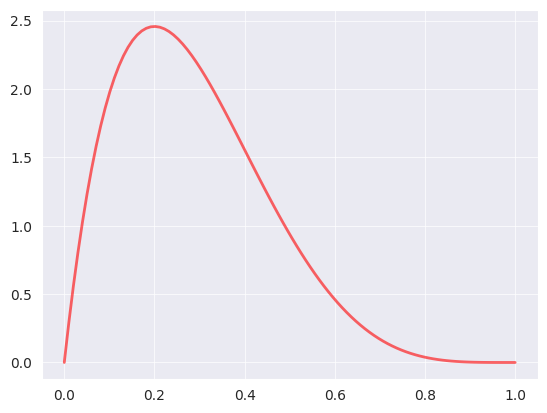

In [ ]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
a, b = 2, 5
x = np.linspace(0.0, 1.0, num=100)
ax.plot(x, beta.pdf(x, a, b),'r-', lw=2, alpha=0.6, label='beta pdf')
plt.show()

#### Simulating using matplotlib and scipy stats

[Text(0.5, 1.0, 'Histogram of B(2,5)'),
 Text(0.5, 0, 'Value'),
 Text(0, 0.5, 'Frequency')]

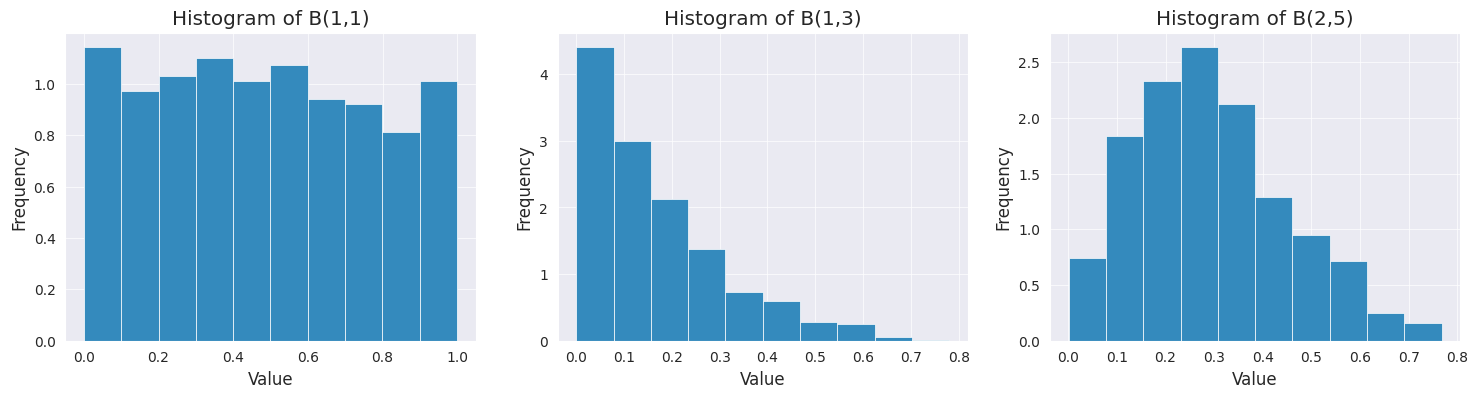

In [ ]:
samples = 1000
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(beta(1,1).rvs(size=samples), density=True)
ax[0].set(title='Histogram of B(1,1)', xlabel='Value', ylabel='Frequency')
ax[1].hist(beta(1,5).rvs(size=samples), density=True)
ax[1].set(title='Histogram of B(1,3)', xlabel='Value', ylabel='Frequency')
ax[2].hist(beta(2,5).rvs(size=samples), density=True)
ax[2].set(title='Histogram of B(2,5)', xlabel='Value', ylabel='Frequency')

#### Simulating the min of players' values

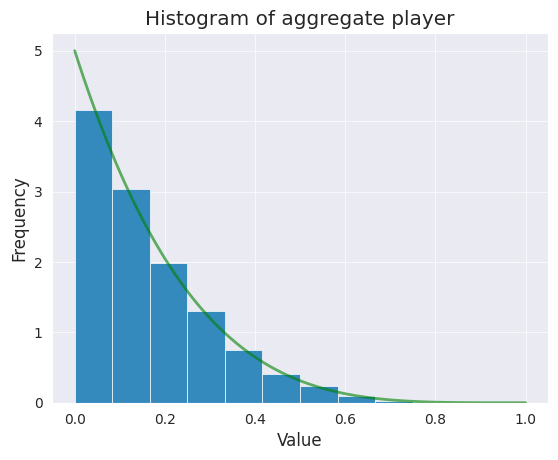

In [ ]:
from scipy.stats import uniform
from scipy.stats import beta
players = 5
samples = 10000
vals = np.empty(shape=[players, samples])
for p in range(players):
    vals[p,] = uniform.rvs(size=samples)

fig, ax = plt.subplots(1, 1)
ax.hist(vals.min(0), density=True)
ax.set(title='Histogram of aggregate player', xlabel='Value', ylabel='Frequency')
a, b = 1, players
x = np.linspace(0.0, 1.0, num=100)
ax.plot(x, beta.pdf(x, a, b),'g-', lw=2, alpha=0.6, label='beta pdf')
plt.show()

## Product copula (independent variables)

In [ ]:
dist_x = stats.uniform()
dist_y = stats.beta(1, 3)

In [ ]:
X = dist_x.rvs(size=10000)
Y = dist_y.rvs(size=10000)

[Text(0.5, 1.0, 'Scatterplot of X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

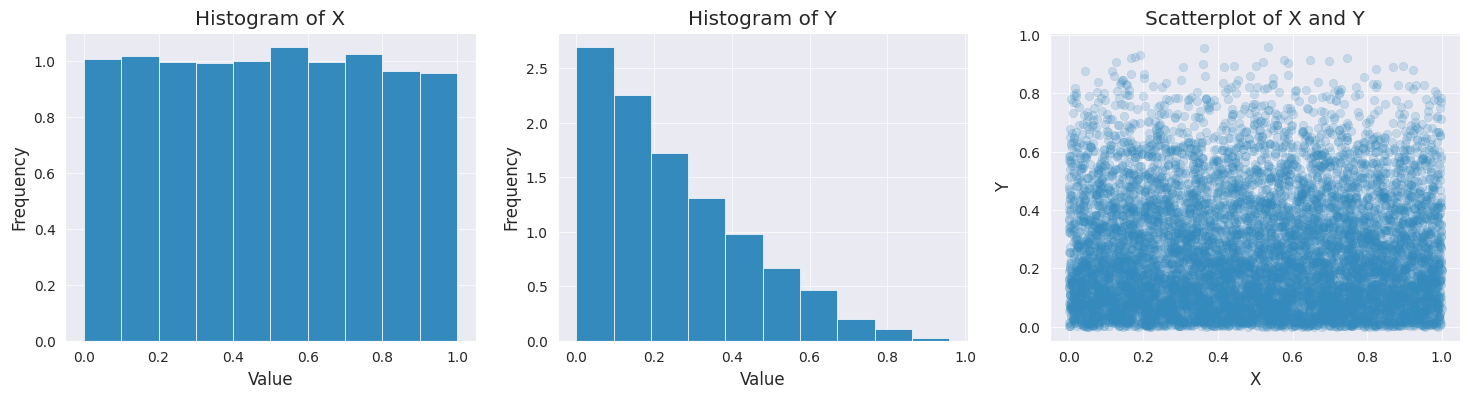

In [ ]:
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(X, density=True)
ax[0].set(title='Histogram of X', xlabel='Value', ylabel='Frequency')
ax[1].hist(Y, density=True)
ax[1].set(title='Histogram of Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(X,Y, alpha=0.2)
ax[2].set(title='Scatterplot of X and Y', xlabel='X', ylabel='Y')

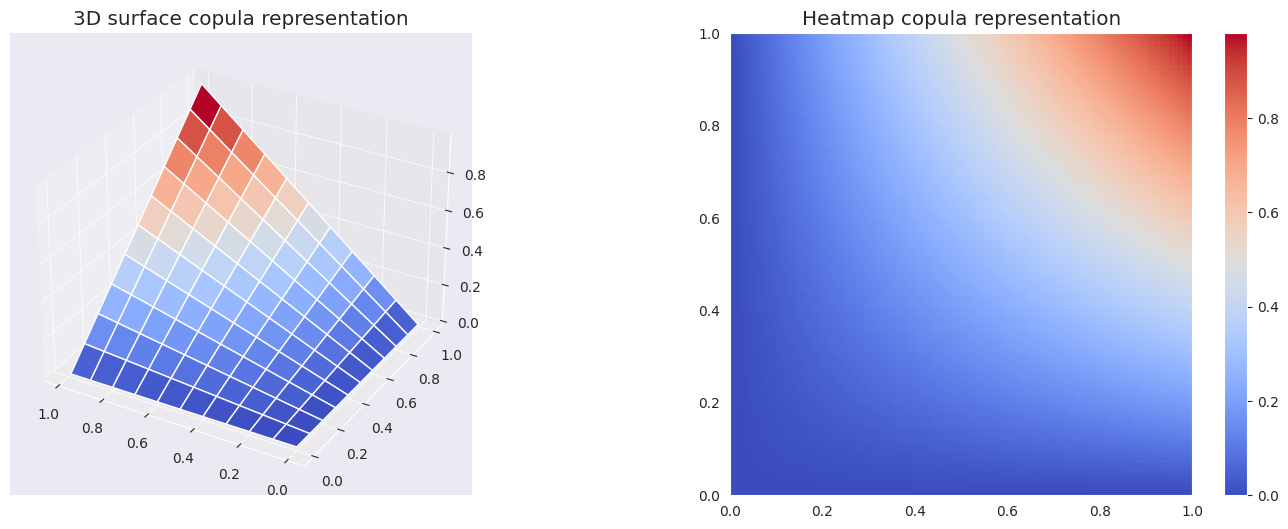

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122)

x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
x,y = np.meshgrid(x,y)

# apply inverse CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(dist_x.ppf(x).flatten(),dist_y.ppf(y).flatten())])
# calculate the product of two CDFs for each point on a grid
z = dist_x.cdf(pairs[:,0]).reshape([100,100]) * dist_y.cdf(pairs[:,1]).reshape([100,100])

ax0.plot_surface(x, y, z, cmap=cm.coolwarm, rstride=10, cstride=10, linewidth=1)
#ax0.invert_yaxis()
ax0.invert_xaxis()
ax0.set(title='3D surface copula representation')
img = ax1.imshow(np.flip(z,axis=0), cmap=cm.coolwarm, extent=[0,1,0,1])
ax1.grid(False)
ax1.set(title='Heatmap copula representation')
fig.colorbar(img)

[Text(0.5, 1.0, 'Scatterplot of transformed X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

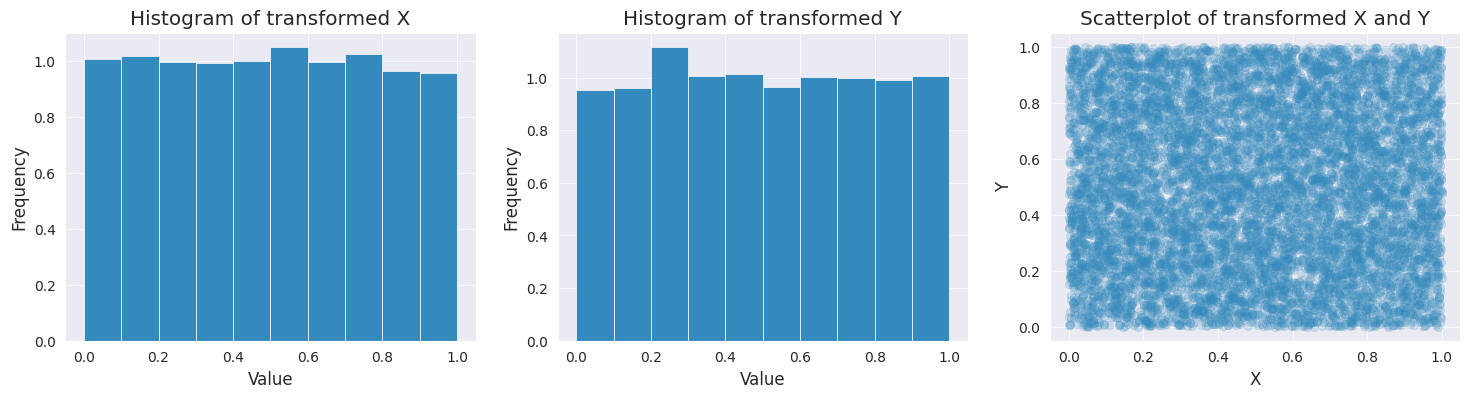

In [ ]:
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(dist_x.cdf(X), density=True)
ax[0].set(title='Histogram of transformed X', xlabel='Value', ylabel='Frequency')
ax[1].hist(dist_y.cdf(Y), density=True)
ax[1].set(title='Histogram of transformed Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(dist_x.cdf(X), dist_y.cdf(Y), alpha=0.2)
ax[2].set(title='Scatterplot of transformed X and Y', xlabel='X', ylabel='Y')

## Distribution of the aggregate player
### Independent uniform distribution
As we saw before, the aggregate player, representing $(d-1)$ players, will report values with probability:
.
$$F_{\neq u1}(y) = (d-1)P(X_i > y)^{(d-2)} = (d-1)\left(1−P(X_i \leq y)\right)^{(d-2)} = (d-1)(1-y)^{(d-2)}$$
     
### General case: correlated distribution
The copula of $(X_{1},X_{2},\dots ,X_{d})$ is defined as the joint cumulative distribution function of $(U_{1},U_{2},\dots ,U_{d})$:

$$ C(u_{1},u_{2},\dots ,u_{d})=\Pr[U_{1}\leq u_{1},U_{2}\leq u_{2},\dots ,U_{d}\leq u_{d}] $$,

where $U_i = F_i(X_i)$ is the marginal CDFs of $X_i$.
The probability of the aggregate player could be calculate using its copula.

For $Y=\min(u_1,\cdots,u_{d-1})$, we are interested in:
$$\mathbb{P}(y)=\mathbb P(\min(U_1,\cdots,U_{d-1}) = y) \tag{1}$$

For two players:
$$
\begin{align*}
1 - F_{Y}(y) & = \mathbb{P}(\min(U_1,U_2)>y) \\
& = \mathbb{P}(U_1>y,U_2>y) \\
& = 1-(\mathbb{P}\left(U_1\leqslant y\right) +\mathbb{P}\left(U_2\leqslant y\right) - \mathbb{P}\left(U_1\leqslant y, U_2\leqslant y\right)) \\
& = 1- \left( F_1(y) + F_2(y) - C(y, y)\right)
\end{align*}$$

where the inclusion exclusion principle was applied to get the last equality. Thus:
$$F_{Y}(y) = F_1(y) + F_2(y) - C(y, y)$$

For three players:
$$\begin{align*}
F_{Y}(y) =\mathbb{P} (\min(U_1,U_2,U_3) \leq y) & = F_1(y)+F_2(y)+F_3(y) \\
& - C_{1,2}(y,y) - C_{1,3}(y,y) - C_{2,3}(y,y) \\
& + C(y,y,y)
\end{align*}$$

For $(d-1)$ players, and using the inclusion–exclusion principle:

$$
\begin{align*}
1-F_Y(y) & = \mathbb{P}(\min(U_1,\cdots,U_{d-1})>y) \\
& = \mathbb{P}(U_1>y,\cdots,U_{d-1}>y) \\
& = 1-(\sum _{k=1}^{d-1} \left( (-1)^{k-1} \sum _{1\leqslant i_{1}<\cdots <i_{k}\leqslant n}\mathbb{P}\left(U_{i_{1}}\leqslant y, \cdots, U_{i_{k}}\leqslant y\right)\right))
\end{align*}$$

or:
$$F_{Y}(y) = \sum _{k=1}^{d-1} \left( (-1)^{k-1} \sum _{1\leqslant i_{1}<\cdots <i_{k}\leqslant n}\mathbb{P}\left(U_{i_{1}}\leqslant y, \cdots, U_{i_{k}}\leqslant y\right)\right) \tag{2}$$


When $C(u_1,\cdots,u_{d-1}) = \prod_{i=1}^{d-1}u_i$, then

Pending ...

$$ \mathbb{P} (y) = (d-1)(1-y)^{(d-2)}$$
as expected for the independent copula.

Some references:
* http://scik.org/index.php/jmcs/article/view/5932
* https://www.casact.org/sites/default/files/old/02pcas_venter.pdf
* https://cran.r-project.org/web/packages/copBasic/copBasic.pdf
* https://stats.stackexchange.com/questions/124865/sampling-from-conditional-copula
* https://math.stackexchange.com/questions/308230/expectation-of-the-min-of-two-independent-random-variables
* https://en.wikipedia.org/wiki/Inclusion%E2%80%93exclusion_principle

## Copula of the aggregate player
If we replace $d-1$ players by its aggregated player $Y=\min(U_1,\cdots,U_{d-1})$ then the problem could be reduced to working with the aggregated copula:
$$C(u_1, y) = C(u_1, \min(U_1,\cdots,U_{d-1}))$$

In the case of the Archimedean copulas, we are working with a $d$-dimensional copula such as
$${\displaystyle C(u_{1},\dots ,u_{d};\theta )=\psi \left(\psi^{-1} (u_{1};\theta )+\cdots +\psi^{-1} (u_{d};\theta );\theta \right)}$$

Using the aggregated player allows to simplify QPQ formulation to two players with a copula such as:

$$C(u_1, y) = \psi_m(\psi_m^{-1}(u_1;\theta_m ) + \psi_m^{-1}(y;\theta_m)) \tag{3}$$


Now, the problem is how to compute $\psi_m$ and $\theta_m$ from the original function $\psi$ and parameter $\theta$.


---

***Are $\psi_m$ and $\psi$ the same?,  Any ideas???***

***Nota: Creo que sí. Al menos, en las primeras simulaciones que he hecho da la sensación de que se comporta como si fueran lo mismo. Tengo que hacer más simulaciones y demostrar que es cierto.***

---
When $u_a=\min(u_2,\cdots,u_d)$ then it must be true that:
$$\begin{align*}
\mathbb{P} (\min(u_1,u_2,\cdots,u_d) \leq y)= \mathbb{P} (\min(u_1,\min(u_2,\cdots,u_d)) \leq y) = \mathbb{P} (\min(u_1,u_a) \leq y)
\end{align*}$$

For three players:
$${\displaystyle C(u_{1}, u_{2} ,u_{3};\theta )=\psi\left(\psi^{-1} (u_{1};\theta )+\psi^{-1} (u_{2};\theta ) +\psi^{-1}  (u_{3};\theta );\theta \right)}$$
When $u_a=\min(u_2,u_3)$
$${\displaystyle C_m(u_{1}, u_a;\theta_m )=\psi_m\left(\psi_m^{-1} (u_{1};\theta_m )+\psi_m^{-1} (u_a;\theta_m );\theta_m \right)}$$
we want to prove that $\theta = \theta_m$ and that $\psi$ and $\psi_m$ are from the same family (the difference is in the number of variables).

For three players, we know that :
$$\begin{align*}
\mathbb{P} (\min(u_1,u_2,u_3) \leq y) & = F_1(y)+F_2(y)+F_3(y) \\
& - C_{1,2}(y,y) - C_{1,3}(y,y) - C_{2,3}(y,y) \\
& + C(y,y,y)
\end{align*}$$

In the case of one player against the aggregate:
$$\begin{align*}
\mathbb{P} (\min(u_1,u_a) \leq y) & = F_1(y)+F_a(y)- C_{1,a}(y,y)
\end{align*}$$
and
$$F_{a}(y)=\begin{align*}
\mathbb{P} (\min(u_2,u_3)\leq y) & = F_2(y)+F_3(y)- C_{2,3}(y,y)
\end{align*}$$


Or:
$$\begin{align*}
F_1(y)+F_2(y)+F_3(y) - C_{1,2}(y,y) - C_{1,3}(y,y) - C_{2,3}(y,y) + C(y,y,y) = F_1(y)+F_a(y)- C_{1,a}(y,y)
\end{align*}$$

but
$$\begin{align*}
F_1(y)+F_a(y)- C_{1,a}(y,y) =
F_1(y)+F_2(y)+F_3(y)- C_{2,3}(y,y)- C_{1,a}(y,y)
\end{align*}$$

simplifying:
$$\begin{align*}
C_{1,a}(y,y) = C_{1,2}(y,y) + C_{1,3}(y,y) - C(y,y,y)
\end{align*}$$

For Archimedean copulas:
$$\begin{align*}
\psi_m\left(\psi_m^{-1} (u_{1};\theta_m )+\psi_m^{-1} (u_a;\theta_m );\theta_m \right) = \psi \left(\psi^{-1} (u_{1};\theta )+\psi^{-1} (u_{2};\theta );\theta \right) +  \psi \left(\psi^{-1} (u_{1};\theta )+\psi^{-1} (u_{3};\theta );\theta \right) -  \psi \left(\psi^{-1} (u_{1};\theta )+\psi^{-1} (u_{2};\theta) +\psi^{-1} (u_{3};\theta);\theta \right)
\end{align*}$$


## Nested Archimedean copulas

At some point, I would like to plug Archimedean copulas into each other. This is call "Nested Archimedean copulas" or "Hierarchical Archimedean copulas". Nested copulas can be modeled by a hierarchical structure of Archimedean copulas, obtained by plugging in Archimedean copulas into each other. Nested Archimedean copulas recently gained interest since they generalize the well-known class of Archimedean copulas to allow for **partial asymmetry**.

In the general case:

$$C(u_1, \cdots, u_d; ψ_0, \cdots, ψ_{d-2}) = \psi_0(\psi_0^{-1}(u_1) + \psi_0^{-1}(C(u_2, \cdots,, u_d; \psi_1, \cdots,, \psi_{d-2}))$$


(From R document) Note that the structure of a nested Archimedean copula can be depicted by a tree. For example,the three-dimensional nested Archimedean copula involving the generators $\psi_0$ and $\psi_1$, which is given by
$$C(u_1, u_2, u_3) = C(u_1, C(u_2, u_3; ψ_1); ψ_0)$$

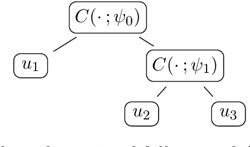



References:
* https://cran.rstudio.com/web/packages/copula/vignettes/nacopula-pkg.pdf

# Archimedean copulas

A copula C is called Archimedean if it admits the representation:
$${\displaystyle C(u_{1},\dots ,u_{d};\theta )=\psi ^{[-1]}\left(\psi (u_{1};\theta )+\cdots +\psi (u_{d};\theta );\theta \right)}$$

Some time, we use intead the following notation:
$${\displaystyle C(u_{1},\dots ,u_{d};\theta )=\psi\left(\psi^{-1} (u_{1};\theta )+\cdots +\psi^{-1}  (u_{d};\theta );\theta \right)}$$
\
A bivariate Archimedean copula induces a binary operator
$$[0, 1] \times  [0, 1] \longrightarrow [0, 1] : (u_1, u_2) \longrightarrow C(u_1, u_2)$$

which is commutative and associative:
$$C(u_1, u_2) = C(u_2, u_1)$$,
$$C(u_1, C(u_2, u_3)) = C(C(u_1, u_2), u_3)$$

endowing $[0, 1]$ with a semi-group structure

## Gumbel copula

### Introduction
The Gumbel copula is an Archimedean copula where tHe generator is $\psi _{\theta }(t) = \left(-\log(t)\right)^{\theta }$ and the generator inverse is $\psi _{\theta }^{-1}(t) = \exp \!\left(-t^{1/\theta }\right)$.

The bivariate Gumbel copula is defined as:

$$C_\theta(u_1, u_2) := e^{\{-[(- \ln u_1)^\theta + (-\ln u_2)^\theta ]^\frac{1}{\theta}\}}$$

where $ \theta \in [1, \infty] $. When $ \theta = 1 $  we obtain the independence copula. When $\theta \to \infty $ the Gumbel copula converges to the comonotonicity copula.




In [141]:
from sympy import *

# define variables
u1, u2, u3, z = symbols('u1 u2 u3 z', nonnegative=True)
theta = Symbol("theta", positive=True)
# define Gumbel copula function for 2 RV
Cgumbel2 = exp(-pow(pow(-ln(u1), theta)+pow(-ln(u2), theta), 1/theta))
# calculate and simplify Copula family expression
simplify(Cgumbel2)

exp(-((-log(u1))**theta + (-log(u2))**theta)**(1/theta))

In [142]:
# compute the density. Just for curiosity
fgumbel2 = simplify(diff(Cgumbel2, u1, u2))
fgumbel2

(-log(u1))**theta*(-log(u2))**theta*((-log(u1))**theta + (-log(u2))**theta)**(-2 + 1/theta)*(theta + ((-log(u1))**theta + (-log(u2))**theta)**(1/theta) - 1)*exp(-((-log(u1))**theta + (-log(u2))**theta)**(1/theta))/(u1*u2*log(u1)*log(u2))

In [143]:
# First, check that the Gumbel Copula is the independent copula when Theta = 1
Cgumbel2.subs(theta, 1)

u1*u2

In [144]:
# As before but using density
fgumbel2.subs(theta, 1)

1

### Aggregated Player

To see how $d-1$ players could be replace by an aggregate player, suppose $U_1,\cdots,U_{d-1}$  are RVs with uniform distributions and correlated by a Gumbel Copula.

For $Y=\min(u_1,u_2)$, and using equation (2), the distribution function of the aggregate player (minimun declared value of two players) is:

$$\begin{align*}
 F_m(y) & =F_{U_1}(y)+F_{U_2}(y)-  C(y,\cdots,y) \\
 & = 2y - e^{- \left(2\left(- \log{\left(y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}
\end{align*}$$

For three players:
$$\begin{align*}
F_m(y) & = 3 * F(y) - 3 * C_2(y,y) + C_3(y,y,y)  \\
& = 3y - 3e^{- \left(2\left(- \log{\left(y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}} +  e^{- \left(3\left(- \log{\left(y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}
\end{align*}$$

And for $d-1$ players:
$$\begin{align*}
F_m(y) & = \sum _{i=1}^{d-1}F_{U_i}(y)-\sum _{i<j}C_{i,j}(y, y)+\sum _{i<j<k}C_{i,j,k}(y,y,y)+\cdots +(-1)^{d-2}\sum _{i<...<d-1}C\left(y,\cdots,y\right) \\
&= (d-1) y - (d-1)e^{- \left((d-2)\left(- \log{\left(y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}} + \cdots + (-1)^{k-1} \binom {d-1}{k}e^{- \left(k\left(- \log{\left(y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}+ \cdots\\
& = \sum _{k=1}^{d-1}(-1)^{k-1}{\binom {d-1}{k}}C_{k}(y,\cdots,y) \\
& = \sum _{k=1}^{d-1}(-1)^{k-1}{\binom {d-1}{k}}e^{- \left(k\left(- \log{\left(y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}} \tag{revisar}
\end{align*}$$

In [145]:
F2m = 2*z - Cgumbel2.subs([(u1,z), (u2,z)])
F2m

2*z - exp(-(2*(-log(z))**theta)**(1/theta))

In [146]:
prMax2 = diff(F2m, z)
prMax2

2 + (2*(-log(z))**theta)**(1/theta)*exp(-(2*(-log(z))**theta)**(1/theta))/(z*log(z))

In [ ]:
y= Symbol("y")
print_latex(prMax2.subs(z,y))

2 + \frac{\left(2 \left(- \log{\left(y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}} e^{- \left(2 \left(- \log{\left(y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}}{y \log{\left(y \right)}}


In [72]:
simplify(prMax2.subs(theta, 1))

2 - 2*z

In [147]:
# define Gumbel copula function for 3 RV
Cgumbel3 = exp(-pow(pow(-ln(u1), theta)+pow(-ln(u2), theta)+pow(-ln(u3), theta), 1/theta))
# calculate and simplify Copula family expression
simplify(Cgumbel3)

exp(-((-log(u1))**theta + (-log(u2))**theta + (-log(u3))**theta)**(1/theta))

In [148]:
F3m=3*z - 3*Cgumbel2.subs([(u1,z), (u2,z)]) + Cgumbel3.subs([(u1,z), (u2,z), (u3,z)])
F3m

3*z + exp(-(3*(-log(z))**theta)**(1/theta)) - 3*exp(-(2*(-log(z))**theta)**(1/theta))

In [149]:
prMax3 =  diff(F3m, z)
prMax3

3 + 3*(2*(-log(z))**theta)**(1/theta)*exp(-(2*(-log(z))**theta)**(1/theta))/(z*log(z)) - (3*(-log(z))**theta)**(1/theta)*exp(-(3*(-log(z))**theta)**(1/theta))/(z*log(z))

In [150]:
simplify(prMax3.subs(theta, 1))

3*z**2 - 6*z + 3

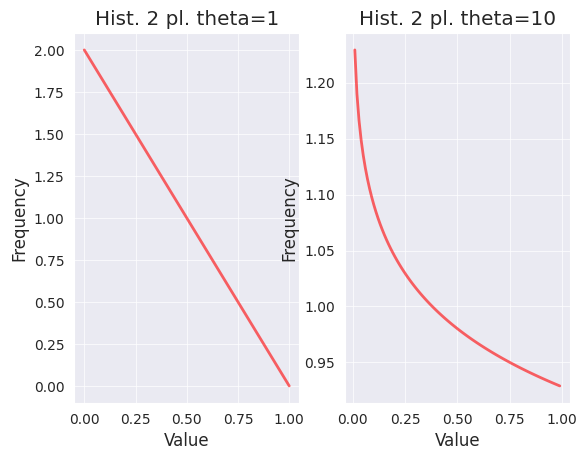

In [81]:
fig, ax = plt.subplots(1, 2)
x = np.linspace(0.0, 1.0, num=100)
pr1 = lambdify(z, prMax2.subs(theta, 1), "numpy")
pr10 = lambdify(z, prMax2.subs(theta, 10), "numpy")
ax[0].plot(x, pr1(x),'r-', lw=2, alpha=0.6, label='Pr Theta=1')
ax[0].set(title='Hist. 2 pl. theta=1', xlabel='Value', ylabel='Frequency')
ax[1].plot(x, pr10(x),'r-', lw=2, alpha=0.6, label='Pr Theta=1')
ax[1].set(title='Hist. 2 pl. theta=10', xlabel='Value', ylabel='Frequency')
plt.show()

In [82]:
# a panel to explore Beta distribution.
import panel as pn
import holoviews as hv

pn.extension(design='material')
theta_widget = pn.widgets.EditableFloatSlider(name='Theta', start=1, end=10, step=0.2, value=1)
@pn.depends(t=theta_widget)
def plot_gumbel_aggregate2(t):
    xs = np.linspace(0,1)
    pr = lambdify(z, prMax2.subs(theta, t), "numpy")
    points = [(i, pr(i)) for i in xs]
    return hv.Curve(points).opts(width=600, framewise=True)

@pn.depends(t=theta_widget)
def plot_gumbel_aggregate3(t):
    xs = np.linspace(0,1)
    pr = lambdify(z, prMax3.subs(theta, t), "numpy")
    points = [(i, pr(i)) for i in xs]
    return hv.Curve(points).opts(width=600, framewise=True)


bound_gumble2_plot = pn.bind(plot_gumbel_aggregate2, t=theta_widget)
bound_gumble3_plot = pn.bind(plot_gumbel_aggregate3, t=theta_widget)
gumble_app =  pn.Column(pn.WidgetBox('## Gumble Explorer', theta_widget), bound_gumble2_plot, bound_gumble3_plot).servable()

gumble_app

Column
    [0] WidgetBox
        [0] Markdown(str)
        [1] EditableFloatSlider(end=10, name='Theta', start=1, step=0.2, value=1, width=300)
    [1] ParamFunction(function, _pane=HoloViews)
    [2] ParamFunction(function, _pane=HoloViews)

### Simulation

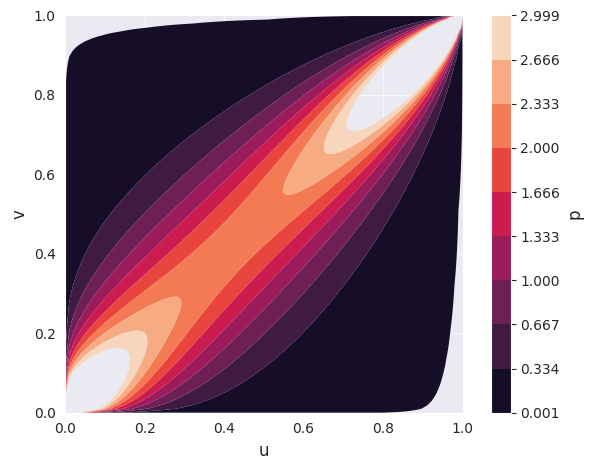

In [84]:
from statsmodels.distributions.copula.api import (CopulaDistribution, GumbelCopula, IndependenceCopula)

default_rng = np.random.default_rng()
copula2 = GumbelCopula(theta=3.1)
_ = copula2.plot_pdf()  # returns a matplotlib figure

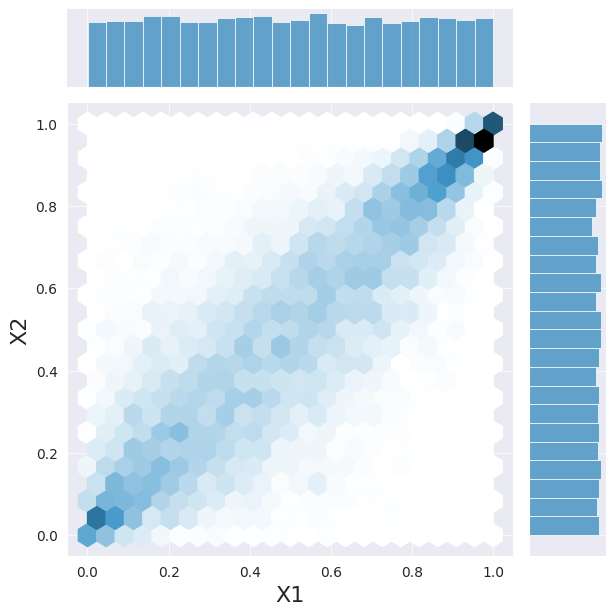

In [85]:
import numpy as np

sample = copula2.rvs(10000, random_state=default_rng)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="hex")
_ = h.set_axis_labels("X1", "X2", fontsize=16)

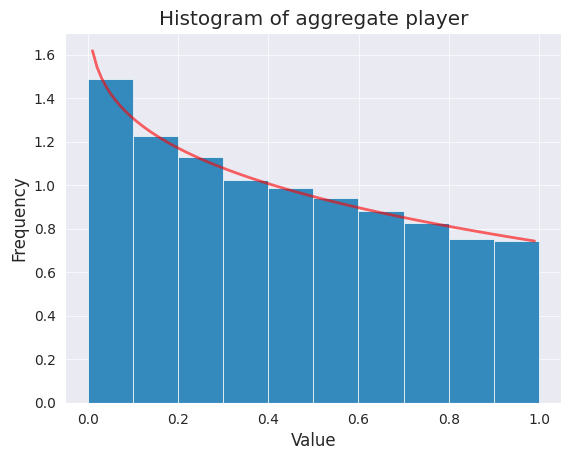

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

players = 2
samples = 10000
t=3.0001

copula3 = GumbelCopula(theta=t, k_dim=players)
vals = copula3.rvs(samples, random_state=default_rng)

# Creating figure
fig, ax = plt.subplots(1, 1)
ax.hist(vals.min(1), density=True)
ax.set(title='Histogram of aggregate player', xlabel='Value', ylabel='Frequency')

x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(z, prMax2.subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
#ax.plot(x, beta.pdf(x, 1, players),'g-', lw=2, alpha=0.6, label='beta pdf')
plt.show()

The current version of the previous library (statsmodels.distributions.copula) has limitations to generate random values in dimensions greater than 2. I try another library called pycop that allows to overcome this limitation.

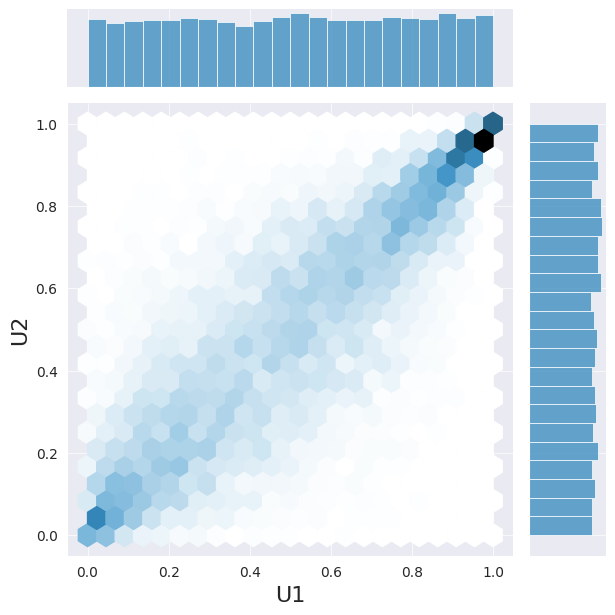

In [87]:
!pip install pycop --quiet
from scipy.stats import norm
from pycop import simulation

players = 2
samples = 10000
t=3.0001
u1, u2 = simulation.simu_archimedean("gumbel", players, samples, theta=t)

h = sns.jointplot(x=u1, y=u2, kind="hex")
_ = h.set_axis_labels("U1", "U2", fontsize=16)

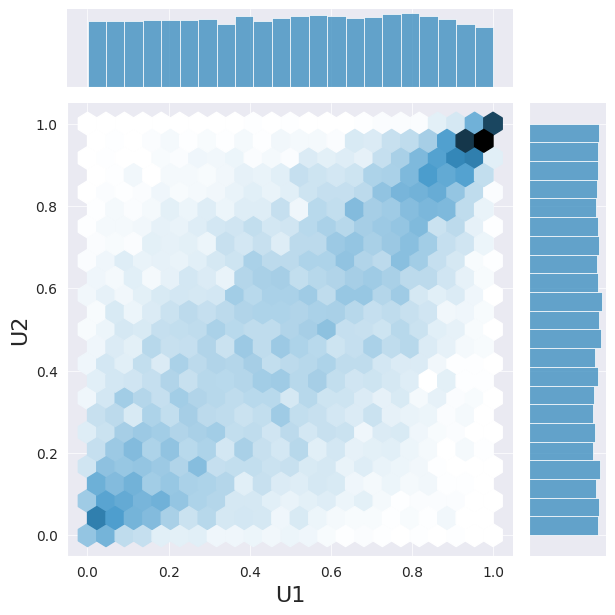

In [95]:
players = 4
samples = 10000
t=2.0001
u = simulation.simu_archimedean("gumbel", players, samples, theta=t)

h = sns.jointplot(x=u[0], y=u[1], kind="hex")
_ = h.set_axis_labels("U1", "U2", fontsize=16)

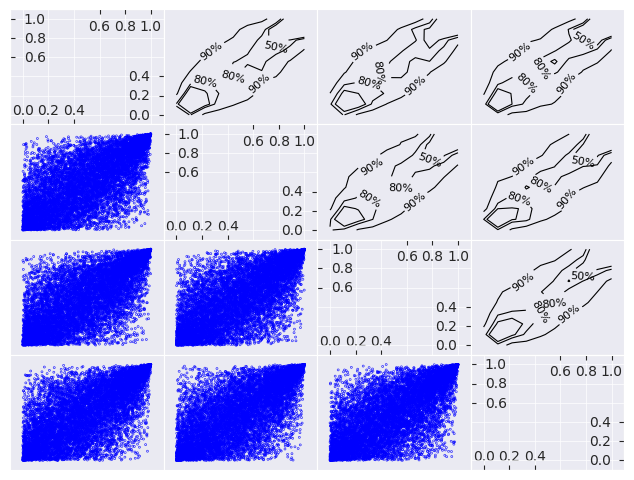

In [96]:
from pycop import utils
utils.empiricalplot(u, contour=True)

### Copula of the aggregated Player

A copula C is called Archimedean if it admits the representation:
$${\displaystyle C(u_{1},\dots ,u_{d};\theta )=\psi \left(\psi^{-1} (u_{1};\theta )+\dots +\psi^{-1} (u_{d};\theta );\theta \right)}$$

The idea is to reduce this formulation to two players where one of the is the aggregate player reporting the mininum value of her cluster:

$$C(u_1, y) = \psi_m(\psi_m^{-1}(u_1;\theta_m ) + \psi_m^{-1}(y;\theta_m)) \tag{3}$$
where $y=\min(u_2,\cdots,u_d)$.

My goal is to try to prove through simulations that it is enough to use the $F_m$ of the aggregate player and that it is not necessary to change the copula (it will remain a Gumble copula) nor the parameter $theta$ that defines it.

To do this I will proceed as follows:

1. Simulate several correlated players.
  1. Check that the minimum of the $d-1$ players corresponds to the function $Fd-1m$.
  2. After that, check that the minimum of a player against the aggregate also corresponds to the function $Fdm$
3. Simulate two clusters of 2 players each. It must remain the same function $Fm$.






In [235]:
from sympy import *
from sympy.abc import k, n

# define variables
y = symbols('y', nonnegative=True)
theta = Symbol("theta", positive=True)

Fm=n*y + Sum((-1)**(k-1)*binomial(n, k)*exp(-pow((k)*pow(-ln(y), theta), 1/theta)), (k, 2, n))

In [236]:
F2min=simplify(Fm.subs(n,2).doit())
F2min

2*y - exp(-(2*(-log(y))**theta)**(1/theta))

In [237]:
F3min=simplify(Fm.subs(n,3).doit())
F3min

3*y + exp(-(3*(-log(y))**theta)**(1/theta)) - 3*exp(-(2*(-log(y))**theta)**(1/theta))

In [238]:
F4min=simplify(Fm.subs(n,4).doit())
F4min

4*y - exp(-(4*(-log(y))**theta)**(1/theta)) + 4*exp(-(3*(-log(y))**theta)**(1/theta)) - 6*exp(-(2*(-log(y))**theta)**(1/theta))

In [239]:
F5min=simplify(Fm.subs(n,5).doit())
F5min

5*y + exp(-(5*(-log(y))**theta)**(1/theta)) - 5*exp(-(4*(-log(y))**theta)**(1/theta)) + 10*exp(-(3*(-log(y))**theta)**(1/theta)) - 10*exp(-(2*(-log(y))**theta)**(1/theta))

In [240]:
# 1.1 Simulate five correlated players.
players = 5
samples = 10000
t=2.0001
u = simulation.simu_archimedean("gumbel", players, samples, theta=t)

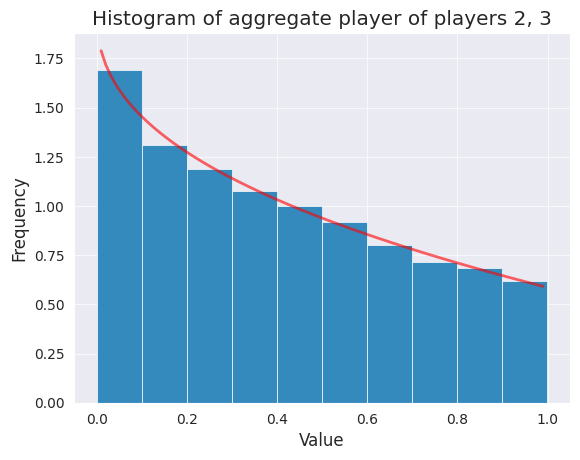

In [244]:
# 1.1 Check that the minimum of the two players corresponds to the function F2min
u_aggr = np.minimum(u[1], u[2])

fig, ax = plt.subplots(1, 1)
ax.hist(u_aggr, density=True)
ax.set(title='Histogram of aggregate player of players 2, 3', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F2min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

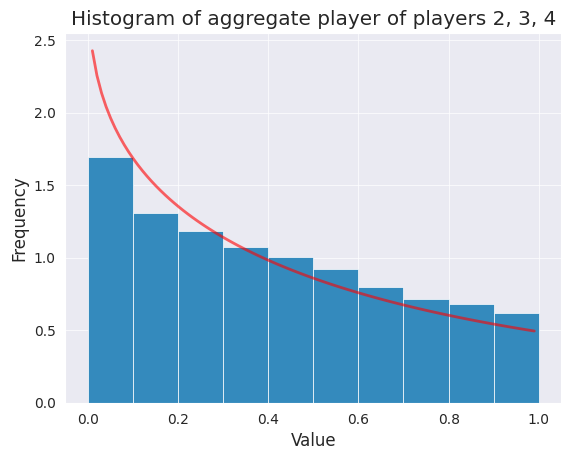

In [245]:
# 1.1 Check that the minimum of the three players corresponds to the function F3min
u_aggr = np.minimum(u[1], u[2], u[3])

fig, ax = plt.subplots(1, 1)
ax.hist(u_aggr, density=True)
ax.set(title='Histogram of aggregate player of players 2, 3, 4', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F3min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

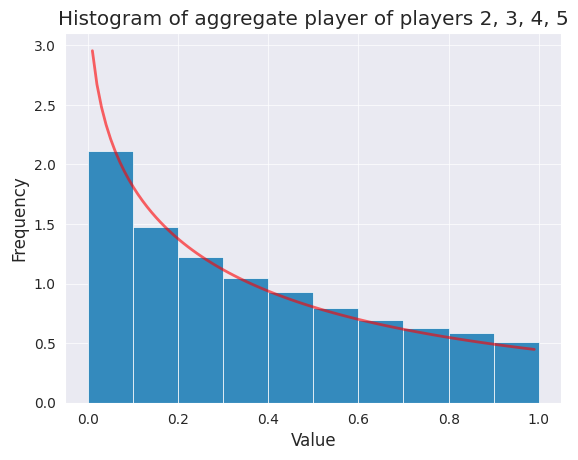

In [248]:
# 1.1 Check that the minimum of the four players corresponds to the function F4min
u_aggr = np.minimum(np.minimum(u[1], u[2]),np.minimum( u[3], u[4]))

fig, ax = plt.subplots(1, 1)
ax.hist(u_aggr, density=True)
ax.set(title='Histogram of aggregate player of players 2, 3, 4, 5', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F4min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

In [252]:
from scipy.stats import rv_continuous
class AggreagatePlayer(rv_continuous):
    """
    Define the RV associate to an aggregate player
    """
    "Aggregate Player"
    dist_name = "Aggregate_Player"
    def __init__(self,cdfepr, theta_param, sym):
      super().__init__(a=0, b=1)
      self.theta = theta_param
      self.symbol = sym
      cdfsymb = cdfepr.subs(theta, theta_param)
      self.cdf_expr = lambdify(sym, cdfsymb, "numpy")
      self.pdf_expr = lambdify(sym, diff(cdfsymb, sym), "numpy")
    def _pdf(self, x):
        return self.pdf_expr(x)

    def _cdf(self, x):
        return self.cdf_expr(x)

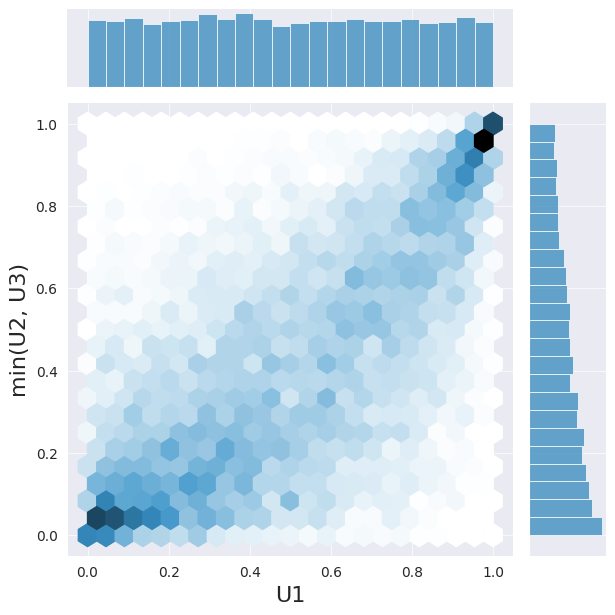

In [253]:
#1.1 check that the minimum of a player against the aggregate also corresponds to the function  F2m
# one player against the aggregate of two
pdfY = AggreagatePlayer(cdfepr=F2min, theta_param=t, sym=y)
marginals = [stats.uniform(), pdfY]
joint_dist = CopulaDistribution(copula=GumbelCopula(theta=t), marginals=marginals)
sample = joint_dist.rvs(samples, random_state=default_rng)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="hex")
_ = h.set_axis_labels("U1", "min(U2, U3)", fontsize=16)

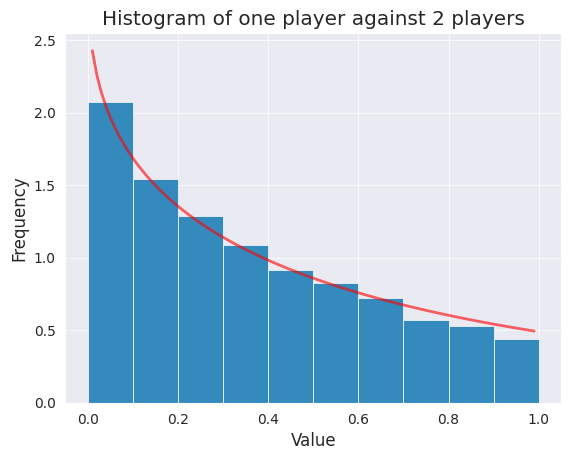

In [255]:
# 1.2  one player against the aggregate of two
u_min = np.minimum(sample[:, 0], sample[:, 1])

fig, ax = plt.subplots(1, 1)
ax.hist(u_min, density=True)
ax.set(title='Histogram of one player against 2 players', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F3min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

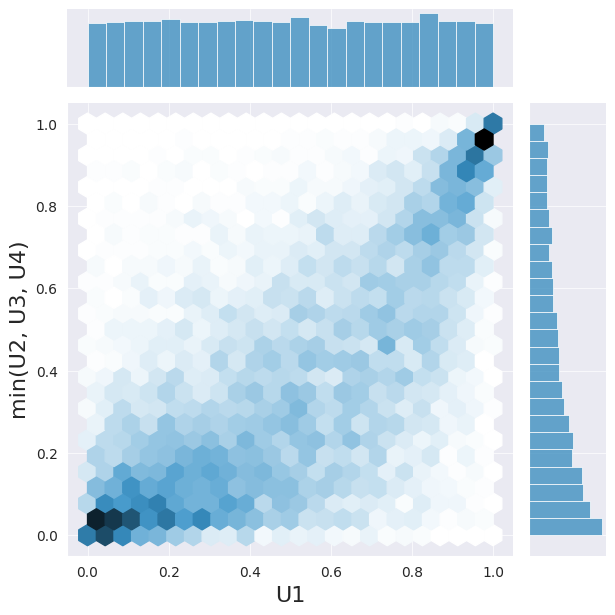

In [256]:
#1.1 check that the minimum of a player against the aggregate also corresponds to the function  F2m
# one player against the aggregate of three
pdfY = AggreagatePlayer(cdfepr=F3min, theta_param=t, sym=y)
marginals = [stats.uniform(), pdfY]
joint_dist = CopulaDistribution(copula=GumbelCopula(theta=t), marginals=marginals)
sample = joint_dist.rvs(samples, random_state=default_rng)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="hex")
_ = h.set_axis_labels("U1", "min(U2, U3, U4)", fontsize=16)

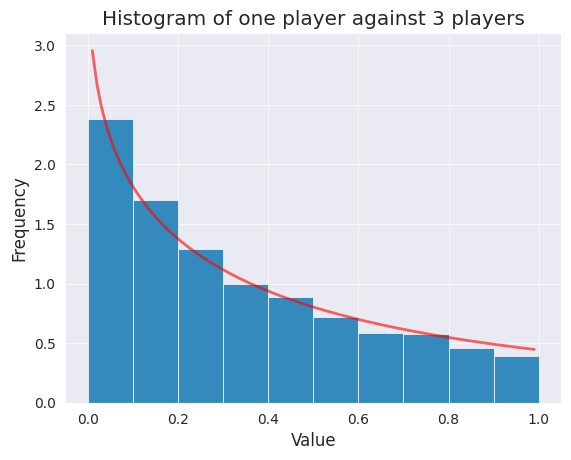

In [258]:
# 1.2  one player against the aggregate of three
u_min = np.minimum(sample[:, 0], sample[:, 1])

fig, ax = plt.subplots(1, 1)
ax.hist(u_min, density=True)
ax.set(title='Histogram of one player against 3 players', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F4min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

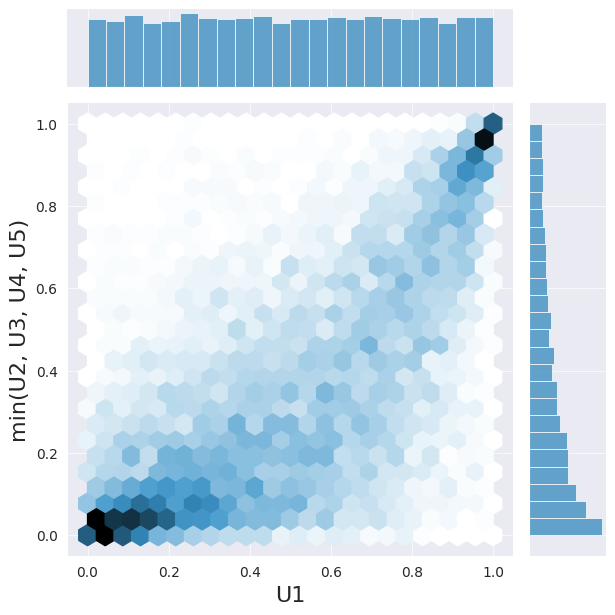

In [259]:
#1.1 check that the minimum of a player against the aggregate also corresponds to the function  F2m
# one player against the aggregate of four
pdfY = AggreagatePlayer(cdfepr=F4min, theta_param=t, sym=y)
marginals = [stats.uniform(), pdfY]
joint_dist = CopulaDistribution(copula=GumbelCopula(theta=t), marginals=marginals)
sample = joint_dist.rvs(samples, random_state=default_rng)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="hex")
_ = h.set_axis_labels("U1", "min(U2, U3, U4, U5)", fontsize=16)

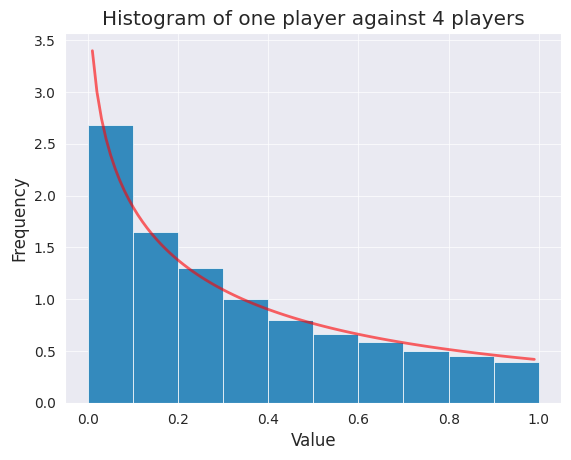

In [260]:
# 1.2  one player against the aggregate of four
u_min = np.minimum(sample[:, 0], sample[:, 1])

fig, ax = plt.subplots(1, 1)
ax.hist(u_min, density=True)
ax.set(title='Histogram of one player against 4 players', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F5min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

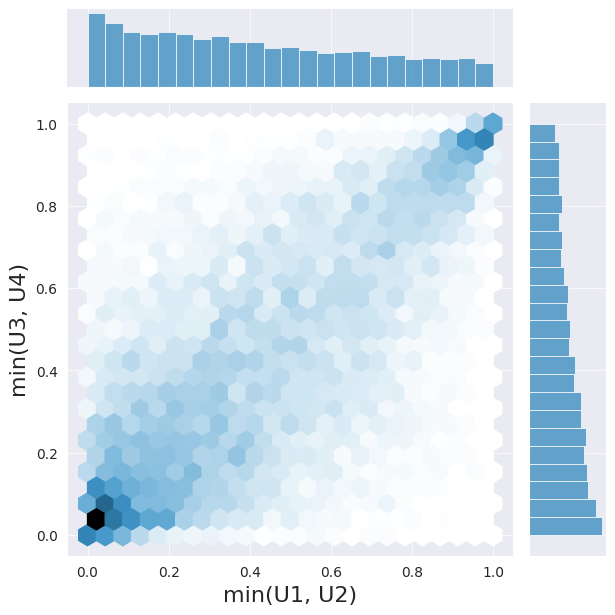

In [262]:
#2.1 Simulate two clusters of 2 players each. It must remain the same function $Fm$.
pdfY = AggreagatePlayer(cdfepr=F2min, theta_param=t, sym=y)
marginals = [pdfY, pdfY]
joint_dist = CopulaDistribution(copula=GumbelCopula(theta=t), marginals=marginals)
sample = joint_dist.rvs(samples, random_state=default_rng)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="hex")
_ = h.set_axis_labels("min(U1, U2)", "min(U3, U4)", fontsize=16)

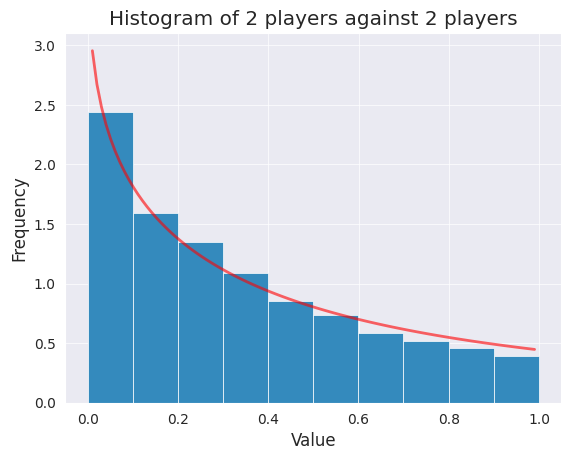

In [263]:
# 2.1  2 players against 2 players
u_min = np.minimum(sample[:, 0], sample[:, 1])

fig, ax = plt.subplots(1, 1)
ax.hist(u_min, density=True)
ax.set(title='Histogram of 2 players against 2 players', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F4min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

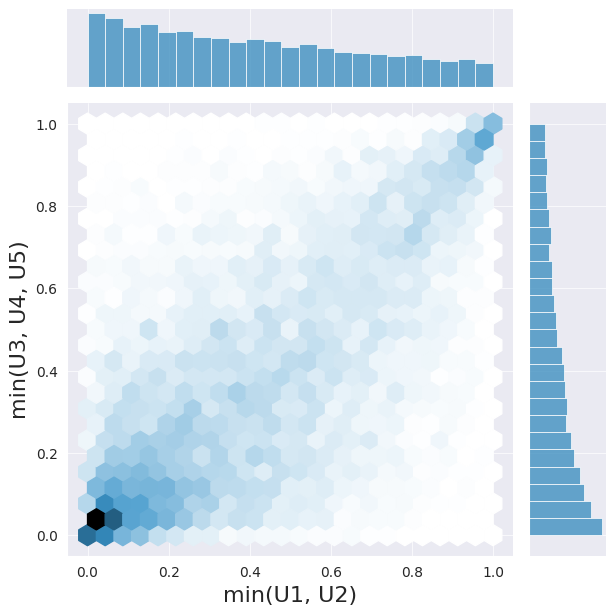

In [264]:
#3.1 Simulate two clusters of 2 and 3 players each. It must remain the same function $Fm$.
pdf2Y = AggreagatePlayer(cdfepr=F2min, theta_param=t, sym=y)
pdf3Y = AggreagatePlayer(cdfepr=F3min, theta_param=t, sym=y)
marginals = [pdf2Y, pdf3Y]
joint_dist = CopulaDistribution(copula=GumbelCopula(theta=t), marginals=marginals)
sample = joint_dist.rvs(samples, random_state=default_rng)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="hex")
_ = h.set_axis_labels("min(U1, U2)", "min(U3, U4, U5)", fontsize=16)

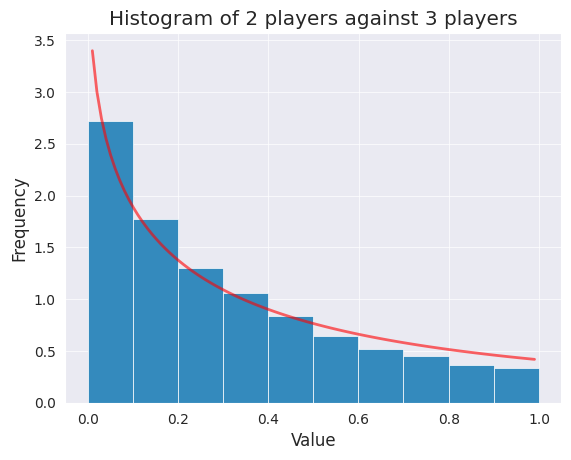

In [265]:
# 3.1  2 players against 3 players
u_min = np.minimum(sample[:, 0], sample[:, 1])

fig, ax = plt.subplots(1, 1)
ax.hist(u_min, density=True)
ax.set(title='Histogram of 2 players against 3 players', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F5min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

## Clayton


### Introduccion
The Clayton copula is a copula that allows any specific non-zero level of (lower) tail dependency between individual variables. It is an Archimedean copula and exchangeable. A Clayton copula is defined as

$$C_\theta(u_1,…,u_d)=(\sum_i^d u_i^{-θ}−d+1)^{−\frac{1}{θ}}$$

In [2]:
from sympy import *

# define variables
u1, u2, u3, z = symbols('u1 u2 u3 z', nonnegative=True)
theta = Symbol("theta")
# define Cyton copula function for 2 RV
Cclayton2 = pow(pow(u1, -theta)+pow(u2, -theta)-2+1, -1/theta)
# calculate and simplify Copula expression
simplify(Cclayton2)

(-1 + u2**(-theta) + u1**(-theta))**(-1/theta)

In [4]:
# define Cyton copula function for 2 RV
Cclayton3 = pow(pow(u1, -theta)+pow(u2, -theta)+pow(u3, -theta)-3+1, -1/theta)
# calculate and simplify Copula expression
simplify(Cclayton3)

(-2 + u3**(-theta) + u2**(-theta) + u1**(-theta))**(-1/theta)

### Aggregate Player
To see how $d-1$ players could be replace by an aggregate player, suppose $U_1,\cdots,U_{d-1}$  are RVs with uniform distributions and correlated by a Clyton Copula.

For $Y=\min(u_1,u_2)$, and using equation (2), the distribution function of the aggregate player (minimun declared value of two players) is:

$$\begin{align*}
 F_m(y) & =F_{U_1}(y)+F_{U_2}(y)-  C(y,\cdots,y) \\
 & = 2y -\left(-1 + 2y^{-\theta}\right)^{\frac{-1}{\theta}}
\end{align*}$$

And for three players:
$$\begin{align*}
 F_m(y) & = 3y -3\left(-1 + 2y^{-\theta}\right)^{\frac{-1}{\theta}}+\left(-2 + 3y^{-\theta}\right)^{\frac{-1}{\theta}}
\end{align*}$$

In [5]:
F2m = 2*z - Cclayton2.subs([(u1,z), (u2,z)])
F2m

2*z - 1/(-1 + 2/z**theta)**(1/theta)

In [7]:
F3m=3*z - 3*Cclayton2.subs([(u1,z), (u2,z)]) + Cclayton3.subs([(u1,z), (u2,z), (u3,z)])
F3m

3*z - 3/(-1 + 2/z**theta)**(1/theta) + (-2 + 3/z**theta)**(-1/theta)

In [28]:
from sympy import *
from sympy.abc import k, n

# define variables
y = symbols('y', nonnegative=True)
theta = Symbol("theta")

Fm=n*y + Sum((-1)**(k-1)*binomial(n, k)* pow(k*pow(y, -theta)-k+1, -1/theta), (k, 2, n))
Fm

n*y + Sum((-1)**(k - 1)*binomial(n, k)/(-k + k/y**theta + 1)**(1/theta), (k, 2, n))

In [33]:
simplify(Fm.subs(n, 3))

3*y - 3/(-1 + 2/y**theta)**(1/theta) + (-2 + 3/y**theta)**(-1/theta)

## Ali-Mikhail-Haq family of copulas


### Introduction
the bivariate Ali-Mikhail-Haq (AMH) copula is:

$$C(u_1, u_2) = \frac{u_1 u_2}{1- \theta (1 - u_1)(1 - u_2)}$$

where $\theta∈[−1,+1)$, where the right boundary,
$\theta=1$, can sometimes be considered valid according to Mächler (2014). The copula $Θ\rightarrow 0$ becomes the independence copula.

In [15]:
from sympy import *

# define variables
u1, u2, u3, z = symbols('u1 u2 u3 z', nonnegative=True)
theta = Symbol("theta")

# define AMH copula function for 2 RV
Camh2 = u1*u2/(1 - theta*(1-u1)*(1-u2))
# calculate and simplify Copula expression
Camh2

u1*u2/(-theta*(1 - u1)*(1 - u2) + 1)

In [16]:
# define AMH copula function
Camh3 = u1*u2*u3/(1 - theta*(1-u1)*(1-u2)*(1-u3))
# calculate and simplify Copula expression
Camh3

u1*u2*u3/(-theta*(1 - u1)*(1 - u2)*(1 - u3) + 1)

### Aggregate Player

In [37]:
F2m = 2*z - Camh2.subs([(u1,z), (u2,z)])
F2m

-z**2/(-theta*(1 - z)**2 + 1) + 2*z

In [53]:
from sympy import *
from sympy.abc import k, n

# define variables
y = symbols('y', nonnegative=True)
theta = Symbol("theta")

Fm=n*y + Sum((-1)**(k-1)*binomial(n, k)* pow(y,k)/(1 - theta*pow(1-y, k)), (k, 2, n))
Fm

n*y + Sum((-1)**(k - 1)*y**k*binomial(n, k)/(-theta*(1 - y)**k + 1), (k, 2, n))

In [56]:
Fm.subs(n, 2).doit()

-y**2/(-theta*(1 - y)**2 + 1) + 2*y

In [55]:
simplify(Fm.subs(n, 3).doit())

y**3/(theta*(y - 1)**3 + 1) + 3*y**2/(theta*(y - 1)**2 - 1) + 3*y

### Simulation

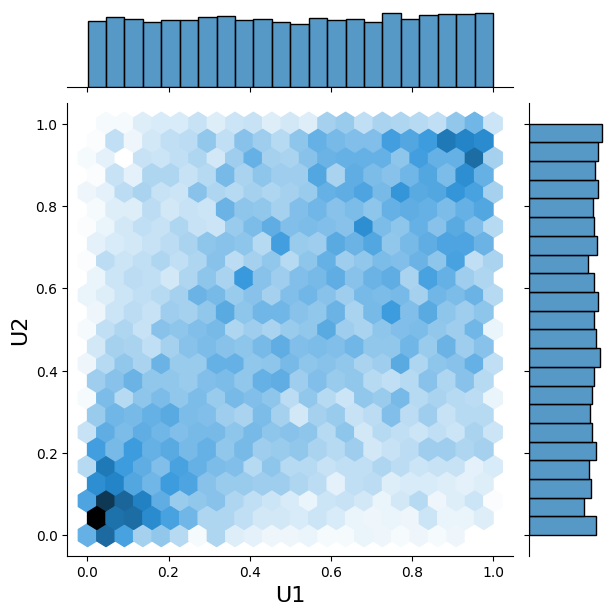

In [59]:
!pip install pycop --quiet
from scipy.stats import norm
import seaborn as sns
import numpy as np
from pycop import simulation

players = 2
samples = 10000
t=0.9 # should be in [-1, 1]
u1, u2 = simulation.simu_archimedean("amh", players, samples, theta=t)

h = sns.jointplot(x=u1, y=u2, kind="hex")
_ = h.set_axis_labels("U1", "U2", fontsize=16)

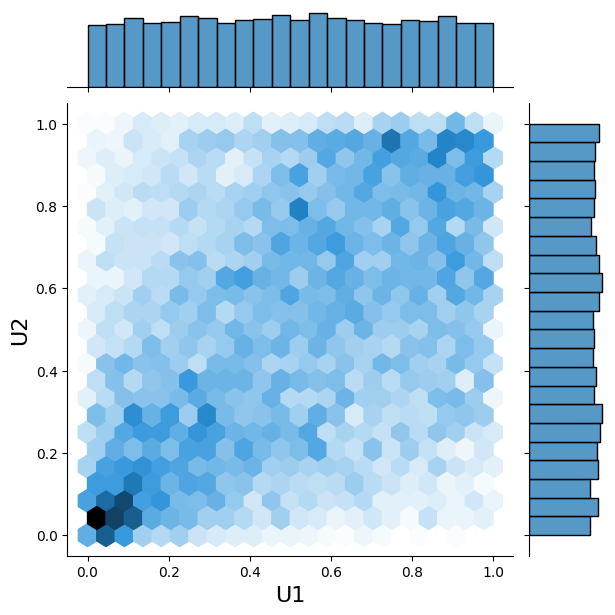

In [70]:
players = 5
samples = 10000
t=0.9
vals = simulation.simu_archimedean("amh", players, samples, theta=t)

h = sns.jointplot(x=vals[0], y=vals[1], kind="hex")
_ = h.set_axis_labels("U1", "U2", fontsize=16)

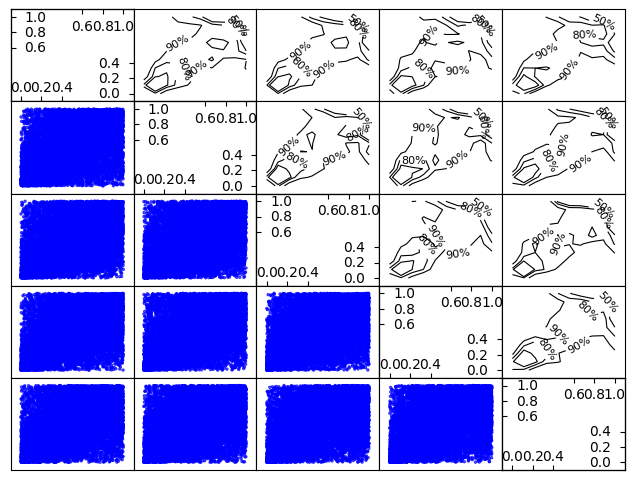

In [71]:
from pycop import utils
utils.empiricalplot(vals, contour=True)

### Copula of the aggregated Player

In [57]:
F2min= Fm.subs(n,2).doit()
F2min

-y**2/(-theta*(1 - y)**2 + 1) + 2*y

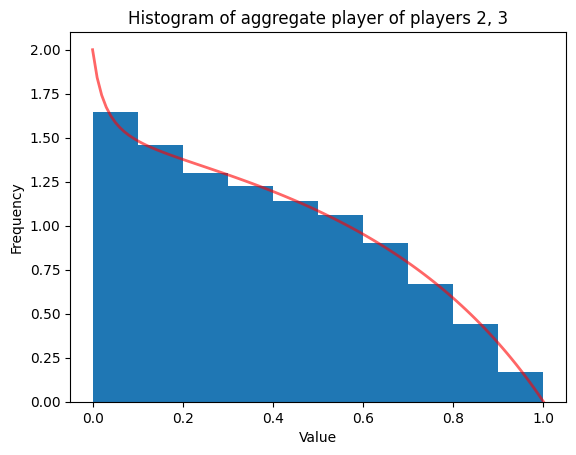

In [64]:
# 1.1 Check that the minimum of the two players corresponds to the function F2min
u_aggr = np.minimum(vals[1], vals[2])

fig, ax = plt.subplots(1, 1)
ax.hist(u_aggr, density=True)
ax.set(title='Histogram of aggregate player of players 2, 3', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F2min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

In [65]:
F3min= Fm.subs(n,3).doit()
F3min

y**3/(-theta*(1 - y)**3 + 1) - 3*y**2/(-theta*(1 - y)**2 + 1) + 3*y

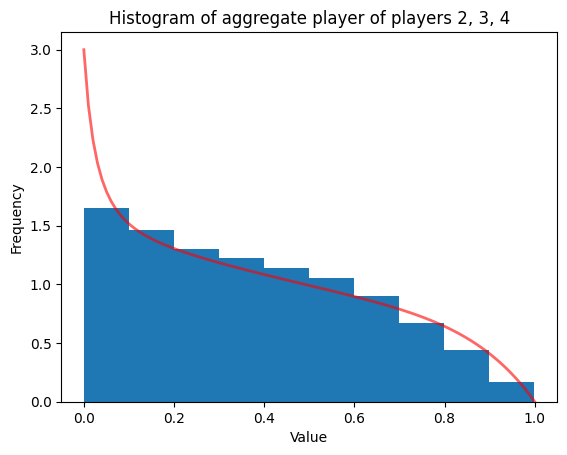

In [67]:
# 1.1 Check that the minimum of the three players corresponds to the function F3min
u_aggr = np.minimum(vals[1], vals[2], vals[3])

fig, ax = plt.subplots(1, 1)
ax.hist(u_aggr, density=True)
ax.set(title='Histogram of aggregate player of players 2, 3, 4', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F3min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

In [68]:
F4min= Fm.subs(n,4).doit()
F4min

-y**4/(-theta*(1 - y)**4 + 1) + 4*y**3/(-theta*(1 - y)**3 + 1) - 6*y**2/(-theta*(1 - y)**2 + 1) + 4*y

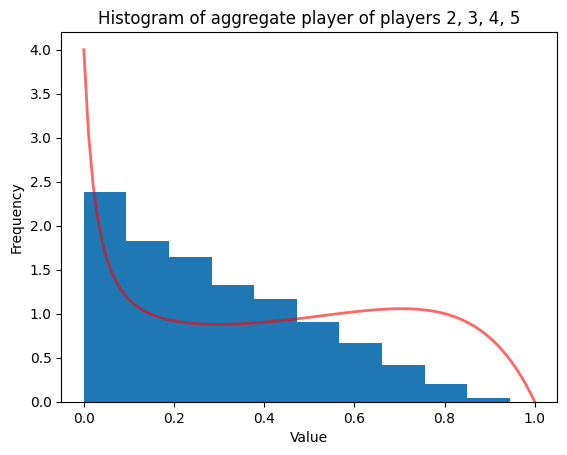

In [72]:
# 1.1 Check that the minimum of the four players corresponds to the function F4min
u_aggr = np.minimum(np.minimum(vals[1], vals[2]),np.minimum(vals[3], vals[4]))

fig, ax = plt.subplots(1, 1)
ax.hist(u_aggr, density=True)
ax.set(title='Histogram of aggregate player of players 2, 3, 4, 5', xlabel='Value', ylabel='Frequency')
x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(y, diff(F4min, y).subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='Pr aggr')
plt.show()

# Gaussian copula

## Introduction

## Simulation

In [ ]:
# define copula parameters
rho = 0.8
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
# define multivariate normal distribution
dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
# sample from the distribution
sample_c = dist_c.rvs(size=10000)

In [ ]:
# obtain marginals X and Y
X = sample_c[:,0]
Y = sample_c[:,1]

[Text(0.5, 1.0, 'Scatterplot of X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

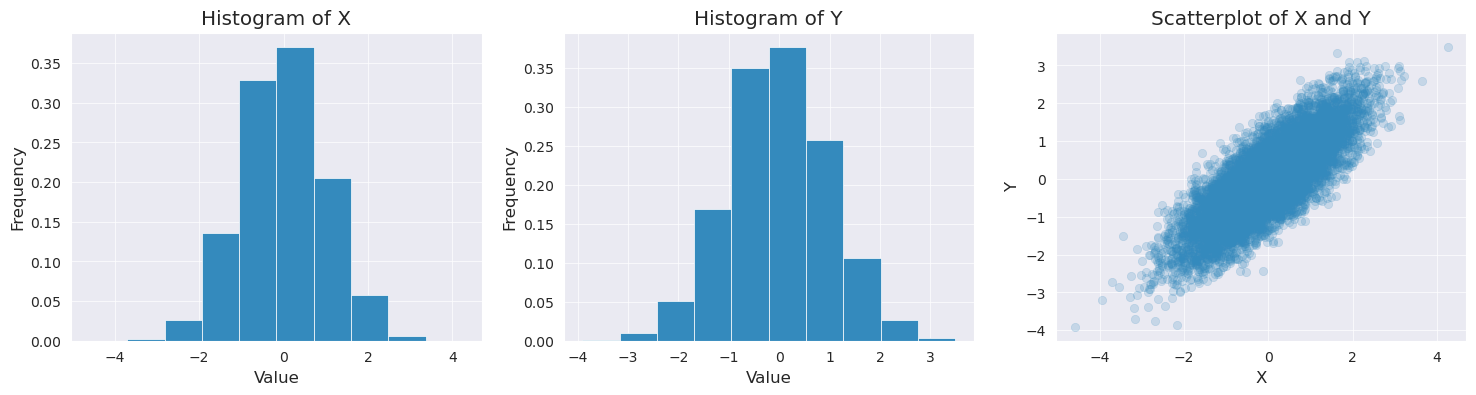

In [ ]:
# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(X, density=True)
ax[0].set(title='Histogram of X', xlabel='Value', ylabel='Frequency')
ax[1].hist(Y, density=True)
ax[1].set(title='Histogram of Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(X, Y, alpha=0.2)
ax[2].set(title='Scatterplot of X and Y', xlabel='X', ylabel='Y')

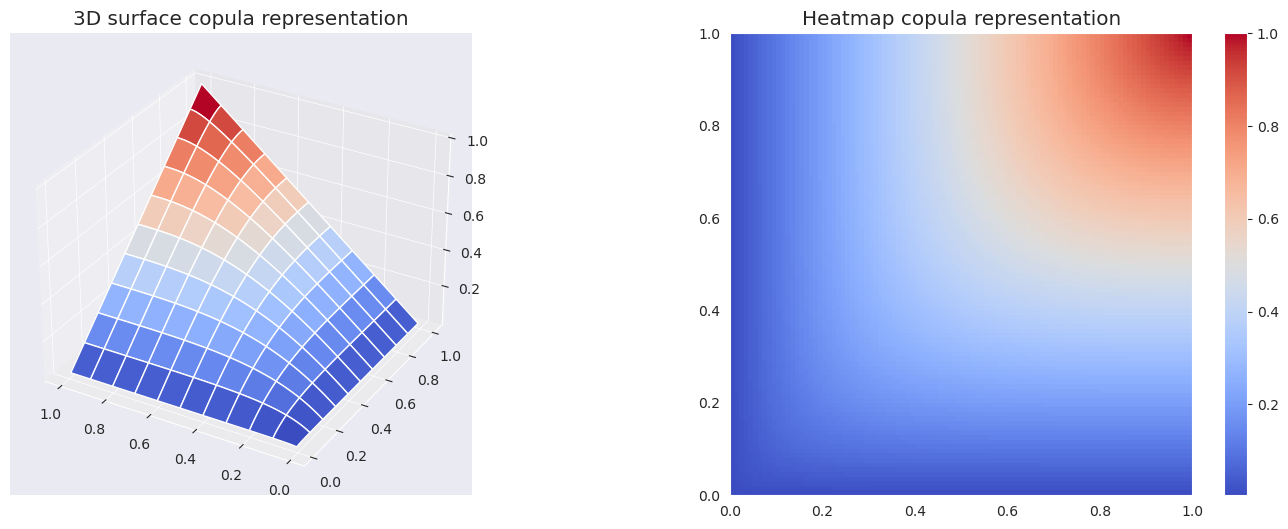

In [ ]:
# create a grid
x = np.arange(0.01,1.01,0.01)
y = np.arange(0.01,1.01,0.01)
x,y = np.meshgrid(x,y)

# apply inverse standard normal CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(stats.norm.ppf(x).flatten(),stats.norm.ppf(y).flatten())])
# calculate the value of bivariate normal CDF for each point on a grid
z = dist_c.cdf(pairs).reshape([100,100])

# plot the resulting copula
fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122)
ax0.plot_surface(x, y, z, cmap=cm.coolwarm, rstride=10, cstride=10, linewidth=1)
#ax0.invert_yaxis()
ax0.invert_xaxis()
ax0.set(title='3D surface copula representation')
img = ax1.imshow(np.flip(z,axis=0), cmap=cm.coolwarm, extent=[0,1,0,1])
ax1.grid(False)
ax1.set(title='Heatmap copula representation')
fig.colorbar(img)

[Text(0.5, 1.0, 'Scatterplot of transformed X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

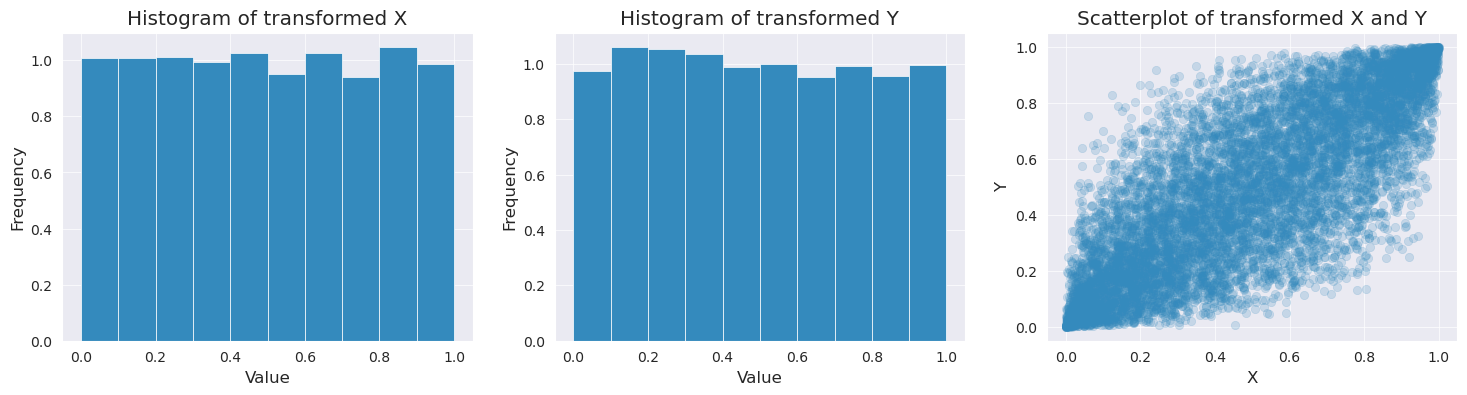

In [ ]:
# transform marginals to uniform
u_x = stats.norm.cdf(X)
u_y = stats.norm.cdf(Y)

# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(u_x, density=True)
ax[0].set(title='Histogram of transformed X', xlabel='Value', ylabel='Frequency')
ax[1].hist(u_y, density=True)
ax[1].set(title='Histogram of transformed Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(u_x, u_y, alpha=0.2)
ax[2].set(title='Scatterplot of transformed X and Y', xlabel='X', ylabel='Y')

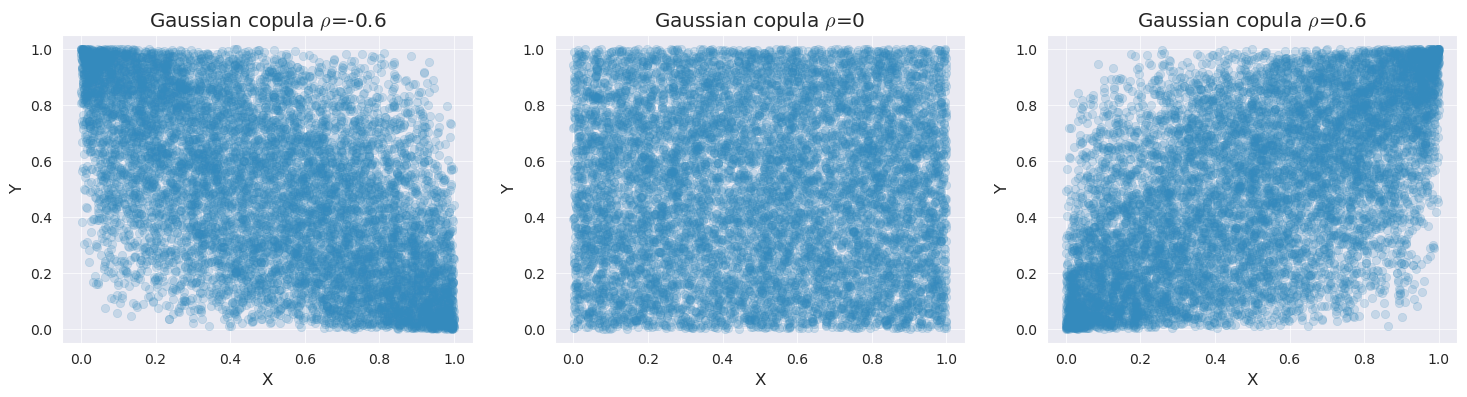

In [ ]:
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)

for i,rho in zip([0,1,2],[-0.6, 0, 0.6]):
    mu_c = np.array([0,0])
    cov_c = np.array([[1,rho],[rho,1]])
    dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
    sample_c = dist_c.rvs(size=10000)

    X = sample_c[:,0]
    Y = sample_c[:,1]
    u_x = stats.norm.cdf(X)
    u_y = stats.norm.cdf(Y)
    ax[i].scatter(u_x, u_y, alpha=0.2)
    ax[i].set(title=r'Gaussian copula $\rho$=' + str(rho), xlabel='X', ylabel='Y')

[Text(0.5, 1.0, 'Joint distribution derived from copula'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

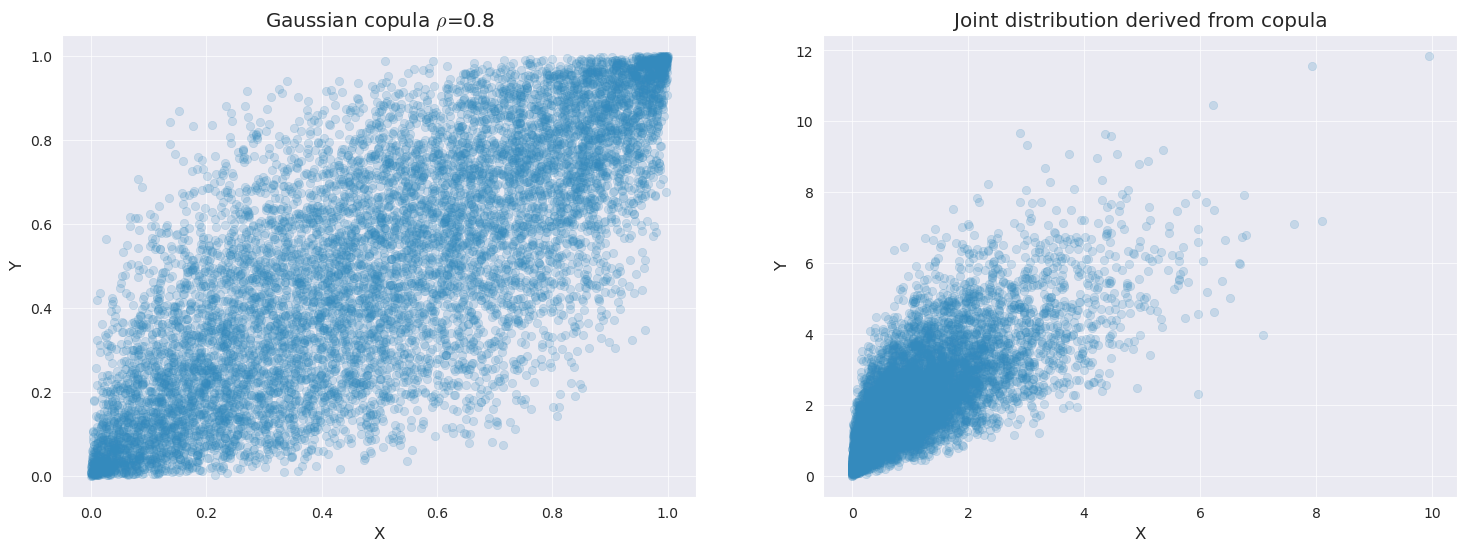

In [ ]:
# define copula parameters
rho=0.8
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
sample_c = dist_c.rvs(size=10000)

# transform marginals to uniform
X = sample_c[:,0]
Y = sample_c[:,1]
u_x = stats.norm.cdf(X)
u_y = stats.norm.cdf(Y)
# define required marginal distributions
dist_x = stats.expon()
dist_y = stats.gamma(a=2)

fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
ax[0].scatter(u_x, u_y, alpha=0.2)
ax[0].set(title=r'Gaussian copula $\rho$=' + str(rho), xlabel='X', ylabel='Y')
ax[1].scatter(dist_x.ppf(u_x), dist_y.ppf(u_y), alpha=0.2)
ax[1].set(title='Joint distribution derived from copula', xlabel='X', ylabel='Y')